In [233]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.utils.validation import check_is_fitted
from sklearn.model_selection import train_test_split
from typing import Union, Optional
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc, classification_report, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import metrics
from catboost import cv
import warnings
warnings.filterwarnings('ignore')

In [234]:
cdf = pd.read_csv("clean.csv")
fdf = pd.read_csv("fraud.csv")

cdf = cdf.drop('Unnamed: 0', axis=1).assign(FLAG=[0]*cdf.shape[0])
fdf = fdf.drop('Unnamed: 0', axis=1).assign(FLAG=[1]*fdf.shape[0])

In [235]:
f_2tnx = fdf[fdf['number_of_tnx'] == 2]
f_2tnx = f_2tnx.sample(frac=1)[:4000]

cdf = pd.concat([cdf[cdf['number_of_tnx'] != 2], f_2tnx])

In [236]:
frames = [cdf, fdf]
df = pd.concat(frames)
df.reset_index().drop('index', axis=1)

df

,number_of_tnx,is_there_2500,number_of_sent_tnx,number_of_received_tnx,ratio_sent_received_tnx,total_sent_eth,total_received_eth,total_eth_interacted_with,sent_received_ratio,unique_values_sent,...,unique_addresses_sent,unique_addresses_received,unique_addresses_all,total_sent_eth_usd,total_received_eth_usd,total_eth_interacted_with_usd,avg_value_of_sent_tnx_usd,avg_value_of_received_tnx_usd,avg_value_of_all_tnx_usd,FLAG
0,1,False,0,1,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0,1,1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0
1,699,False,0,699,0.00,0.000000,50.039000,50.039000,0.000000,0,...,0,289,289,0.000000,19374.600410,1.937460e+04,0.000000,27.678001,27.678001,0
2,1,False,0,1,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0,1,1,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0
3,8,False,5,3,1.25,1.591386,1.593083,3.184469,0.998929,5,...,5,3,8,369.344784,369.738585,7.390834e+02,61.557464,92.434646,82.120374,0
4,5,False,3,2,1.00,2000.998585,2001.000000,4001.998585,0.999999,3,...,3,2,5,789714.101592,789714.660000,1.579429e+06,197428.525398,263238.220000,263238.126932,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28801,3,False,2,1,1.00,0.000883,0.001913,0.002797,0.459226,2,...,2,1,3,1.609316,3.486188,5.095504e+00,0.536439,1.743094,1.273876,1
28802,2,False,1,1,0.50,0.000000,0.002481,0.002481,0.000000,1,...,1,1,2,0.000000,4.312712,4.312712e+00,0.000000,2.156356,1.437571,1
28803,2,False,1,1,0.50,0.000000,0.002130,0.002130,0.000000,1,...,1,1,2,0.000000,3.158481,3.158481e+00,0.000000,1.579241,1.052827,1
28804,2,False,1,1,0.50,0.000000,0.001888,0.001888,0.000000,1,...,1,1,2,0.000000,3.370848,3.370848e+00,0.000000,1.685424,1.123616,1


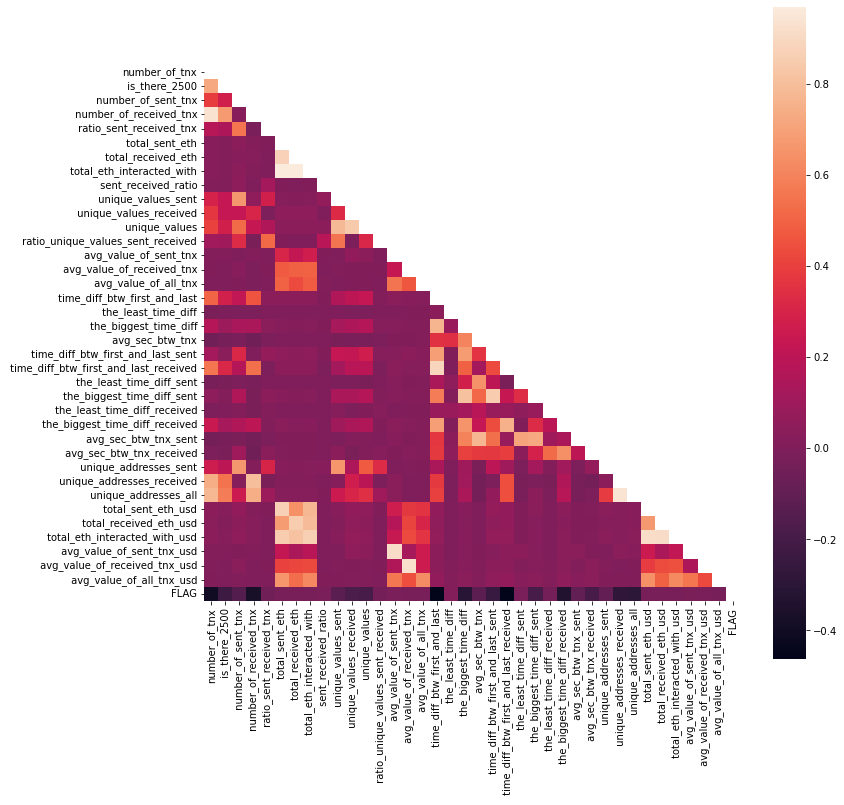

In [101]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=True
plt.figure(figsize=(12, 12))
sns.heatmap(data=corr, mask=mask, square=True)
plt.show()

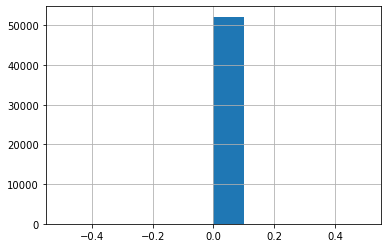

In [89]:
df[' the_least_time_diff_sent'].hist()
plt.show()

In [237]:
df.keys()

Index(['number_of_tnx', ' is_there_2500', ' number_of_sent_tnx',
       ' number_of_received_tnx', ' ratio_sent_received_tnx',
       ' total_sent_eth', ' total_received_eth', ' total_eth_interacted_with',
       ' sent_received_ratio', ' unique_values_sent',
       ' unique_values_received', ' unique_values',
       ' ratio_unique_values_sent_received', ' avg_value_of_sent_tnx',
       ' avg_value_of_received_tnx', ' avg_value_of_all_tnx',
       ' time_diff_btw_first_and_last', ' the_least_time_diff',
       ' the_biggest_time_diff', ' avg_sec_btw_tnx',
       ' time_diff_btw_first_and_last_sent',
       ' time_diff_btw_first_and_last_received', ' the_least_time_diff_sent',
       ' the_biggest_time_diff_sent', ' the_least_time_diff_received',
       ' the_biggest_time_diff_received', ' avg_sec_btw_tnx_sent',
       ' avg_sec_btw_tnx_received', ' unique_addresses_sent',
       ' unique_addresses_received', ' unique_addresses_all',
       ' total_sent_eth_usd', ' total_received_eth_us

In [239]:
df = pd.read_csv('divided_by_time.csv').drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
df.keys()

Index(['number_of_tnx', ' is_there_2500', ' number_of_sent_tnx',
       ' number_of_received_tnx', ' ratio_sent_received_tnx',
       ' total_sent_eth', ' total_received_eth', ' total_eth_interacted_with',
       ' sent_received_ratio', ' unique_values_sent',
       ' unique_values_received', ' unique_values',
       ' ratio_unique_values_sent_received', ' avg_value_of_sent_tnx',
       ' avg_value_of_received_tnx', ' avg_value_of_all_tnx',
       ' time_diff_btw_first_and_last', ' the_least_time_diff',
       ' the_biggest_time_diff', ' avg_sec_btw_tnx',
       ' time_diff_btw_first_and_last_sent',
       ' time_diff_btw_first_and_last_received', ' the_least_time_diff_sent',
       ' the_biggest_time_diff_sent', ' the_least_time_diff_received',
       ' the_biggest_time_diff_received', ' avg_sec_btw_tnx_sent',
       ' avg_sec_btw_tnx_received', ' unique_addresses_sent',
       ' unique_addresses_received', ' unique_addresses_all',
       ' total_sent_eth_usd', ' total_received_eth_us

In [221]:
scaler = StandardScaler()

scaled_df = pd.DataFrame(scaler.fit_transform(df.drop(["FLAG", ' is_there_2500'], axis=1)))
scaled_df["FLAG"] = df["FLAG"].values
scaled_df[' is_there_2500'] = df[' is_there_2500'].values

labels = list(df.drop([' is_there_2500', 'FLAG'], axis=1).columns)

scaled_df = scaled_df.rename({i: labels[i] for i in range(len(labels))}, axis='columns')

In [252]:
scaled_df

,number_of_tnx,number_of_sent_tnx,number_of_received_tnx,ratio_sent_received_tnx,total_sent_eth,total_received_eth,total_eth_interacted_with,sent_received_ratio,unique_values_sent,unique_values_received,...,unique_values_receiveddivided by time,unique_valuesdivided by time,unique_addresses_sentdivided by time,unique_addresses_receiveddivided by time,unique_addresses_alldivided by time,total_sent_eth_usddivided by time,total_received_eth_usddivided by time,total_eth_interacted_with_usddivided by time,FLAG,is_there_2500
0,-0.327592,-0.147032,-0.297200,-0.060489,-0.017791,-0.017753,-0.018372,-0.012938,-0.107789,-0.156782,...,-0.011605,0.238288,1.988342,-0.011790,0.238034,-0.043716,-0.016715,-0.025990,1,False
1,-0.327592,-0.147032,-0.297200,-0.060489,-0.017791,-0.017753,-0.018372,-0.012938,-0.107789,-0.156782,...,-0.220959,-0.179586,0.325321,-0.221128,-0.179815,-0.043716,-0.016824,-0.026089,1,False
2,-0.255858,-0.065367,-0.251662,-0.058030,-0.017582,-0.017568,-0.018168,-0.012938,-0.044780,0.031074,...,-0.334359,-0.405933,-0.575481,-0.334518,-0.406149,-0.043715,-0.016869,-0.026129,0,False
3,-0.315345,-0.127817,-0.291508,-0.054097,-0.017765,-0.017727,-0.018345,-0.012938,-0.080785,-0.133300,...,-0.334346,-0.405910,-0.575372,-0.334505,-0.406122,-0.043715,-0.016869,-0.026128,1,False
4,-0.318844,-0.151836,-0.285816,-0.066881,-0.017791,-0.017753,-0.018372,-0.012938,-0.116790,-0.156782,...,-0.334331,-0.405906,-0.575482,-0.334405,-0.406036,-0.043716,-0.016869,-0.026129,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52154,4.042890,-0.151836,4.444525,-0.066881,-0.017791,-0.017753,-0.018372,-0.012938,-0.116790,-0.156782,...,-0.334359,-0.405935,-0.575482,-0.334485,-0.406116,-0.043716,-0.016869,-0.026129,0,True
52155,-0.311845,-0.103798,-0.297200,-0.002958,-0.017733,-0.017707,-0.018318,-0.012938,-0.062782,-0.156782,...,-0.334350,-0.405867,-0.574942,-0.334509,-0.406072,-0.043633,-0.016851,-0.026091,1,False
52156,-0.327592,-0.147032,-0.297200,-0.060489,-0.017791,-0.017753,-0.018372,-0.012938,-0.107789,-0.156782,...,-0.265576,-0.268641,-0.029093,-0.265740,-0.268865,-0.043716,-0.016840,-0.026103,1,False
52157,0.722164,1.154803,0.327060,-0.056376,-0.017564,-0.017532,-0.018141,-0.012938,2.331566,2.418406,...,-0.334327,-0.405876,-0.575480,-0.334518,-0.406149,-0.043716,-0.016869,-0.026129,0,False


In [137]:
df.to_csv('not_scaled_df.csv')

In [106]:
num_features = list(map(str, input().split(', ')))

number_of_tnx, is_there_2500, number_of_sent_tnx, number_of_received_tnx, ratio_sent_received_tnx, total_sent_eth, total_received_eth, total_eth_interacted_with, sent_received_ratio, unique_values_sent, unique_values_received, unique_values, ratio_unique_values_sent_received, avg_value_of_sent_tnx, avg_value_of_received_tnx, avg_value_of_all_tnx, time_diff_btw_first_and_last, the_least_time_diff, the_biggest_time_diff, avg_sec_btw_tnx, time_diff_btw_first_and_last_sent, time_diff_btw_first_and_last_received, the_least_time_diff_sent, the_biggest_time_diff_sent, the_least_time_diff_received, the_biggest_time_diff_received, avg_sec_btw_tnx_sent, avg_sec_btw_tnx_received, unique_addresses_sent, unique_addresses_received, unique_addresses_all, total_sent_eth_usd, total_received_eth_usd, total_eth_interacted_with_usd, avg_value_of_sent_tnx_usd, avg_value_of_received_tnx_usd, avg_value_of_all_tnx_usd


In [249]:
df = df.sample(frac=1).reset_index().drop('index', axis=1)


,number_of_tnx,is_there_2500,number_of_sent_tnx,number_of_received_tnx,ratio_sent_received_tnx,total_sent_eth,total_received_eth,total_eth_interacted_with,sent_received_ratio,unique_values_sent,...,total_eth_interacted_withdivided by time,unique_values_sentdivided by time,unique_values_receiveddivided by time,unique_valuesdivided by time,unique_addresses_sentdivided by time,unique_addresses_receiveddivided by time,unique_addresses_alldivided by time,total_sent_eth_usddivided by time,total_received_eth_usddivided by time,total_eth_interacted_with_usddivided by time
1,1,False,0,1,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
2,11,False,9,2,3.00,3.077333,3.085000,6.162333,0.997512,3,...,2.069628e-06,1.007554e-06,6.717026e-07,1.679257e-06,6.717026e-07,6.717026e-07,1.343405e-06,0.000236,0.000237,0.000473
11,3,False,2,1,1.00,0.351047,0.351929,0.702976,0.997465,2,...,2.824447e-07,8.035685e-07,4.017842e-07,1.205353e-06,8.035685e-07,4.017842e-07,1.205353e-06,0.000027,0.000027,0.000054
14,2500,True,0,2500,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0.000000e+00,0.000000e+00,1.216473e-08,1.216473e-08,0.000000e+00,2.384288e-06,2.384288e-06,0.000000,0.000000,0.000000
16,53,False,30,23,1.25,4021.250000,24.663596,4045.913596,163.043877,15,...,7.193666e-05,2.667012e-07,3.200414e-07,5.156222e-07,2.667012e-07,3.378215e-07,5.867426e-07,0.013172,0.000081,0.013253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52147,28,False,0,28,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0.000000e+00,0.000000e+00,1.146976e-07,1.146976e-07,0.000000e+00,2.293951e-07,2.293951e-07,0.000000,0.000000,0.000000
52149,4,False,3,1,1.50,100.998446,101.000000,201.998446,0.999985,3,...,4.715183e-02,7.002801e-04,2.334267e-04,9.337068e-04,7.002801e-04,2.334267e-04,9.337068e-04,5.388941,5.389024,10.777966
52150,10,False,0,10,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0.000000e+00,0.000000e+00,4.671456e-06,4.671456e-06,0.000000e+00,2.802874e-05,2.802874e-05,0.000000,0.000000,0.000000
52151,52,False,0,52,0.00,0.000000,0.000000,0.000000,0.000000,0,...,0.000000e+00,0.000000e+00,5.522936e-08,5.522936e-08,0.000000e+00,3.866055e-07,3.866055e-07,0.000000,0.000000,0.000000


In [224]:
df_scaled

NameError: name 'df_scaled' is not defined

In [228]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib

joblib.dump(scaler, 'std_scaler_on_divided_by_time.bin', compress=True)

['std_scaler_on_divided_by_time.bin']

In [229]:
from catboost import cv

params=Grid_CBC.best_params_
params['loss_function'] = 'Logloss'
params['eval_metric'] = 'AUC'
params['verbose'] = True

cv_data = cv(
    params=params,
    pool=Pool(X, label=y),
    fold_count=5,
    shuffle=True,
    partition_random_seed=42,
    stratified=True,
    verbose=True)

Training on fold [0/5]
0:	test: 0.9560597	best: 0.9560597 (0)	total: 12.5ms	remaining: 19.3s
1:	test: 0.9649950	best: 0.9649950 (1)	total: 24.9ms	remaining: 19.3s
2:	test: 0.9670633	best: 0.9670633 (2)	total: 38.3ms	remaining: 19.7s
3:	test: 0.9674074	best: 0.9674074 (3)	total: 48.4ms	remaining: 18.7s
4:	test: 0.9674591	best: 0.9674591 (4)	total: 59.6ms	remaining: 18.4s
5:	test: 0.9686445	best: 0.9686445 (5)	total: 71.2ms	remaining: 18.3s
6:	test: 0.9692836	best: 0.9692836 (6)	total: 82.5ms	remaining: 18.2s
7:	test: 0.9701675	best: 0.9701675 (7)	total: 96.3ms	remaining: 18.6s
8:	test: 0.9704892	best: 0.9704892 (8)	total: 108ms	remaining: 18.5s
9:	test: 0.9707231	best: 0.9707231 (9)	total: 120ms	remaining: 18.6s
10:	test: 0.9707032	best: 0.9707231 (9)	total: 133ms	remaining: 18.7s
11:	test: 0.9712126	best: 0.9712126 (11)	total: 148ms	remaining: 19s
12:	test: 0.9713910	best: 0.9713910 (12)	total: 163ms	remaining: 19.3s
13:	test: 0.9716592	best: 0.9716592 (13)	total: 176ms	remaining: 19.3

118:	test: 0.9835753	best: 0.9835753 (118)	total: 1.5s	remaining: 18s
119:	test: 0.9835964	best: 0.9835964 (119)	total: 1.51s	remaining: 18s
120:	test: 0.9836371	best: 0.9836371 (120)	total: 1.52s	remaining: 18s
121:	test: 0.9836783	best: 0.9836783 (121)	total: 1.54s	remaining: 18s
122:	test: 0.9837078	best: 0.9837078 (122)	total: 1.55s	remaining: 18s
123:	test: 0.9837147	best: 0.9837147 (123)	total: 1.56s	remaining: 18s
124:	test: 0.9837314	best: 0.9837314 (124)	total: 1.58s	remaining: 18s
125:	test: 0.9837504	best: 0.9837504 (125)	total: 1.59s	remaining: 18s
126:	test: 0.9838268	best: 0.9838268 (126)	total: 1.6s	remaining: 18s
127:	test: 0.9838550	best: 0.9838550 (127)	total: 1.61s	remaining: 17.9s
128:	test: 0.9838761	best: 0.9838761 (128)	total: 1.63s	remaining: 17.9s
129:	test: 0.9838962	best: 0.9838962 (129)	total: 1.64s	remaining: 17.9s
130:	test: 0.9839446	best: 0.9839446 (130)	total: 1.65s	remaining: 17.9s
131:	test: 0.9839849	best: 0.9839849 (131)	total: 1.67s	remaining: 17.9

235:	test: 0.9857832	best: 0.9857832 (235)	total: 3.07s	remaining: 17.1s
236:	test: 0.9857938	best: 0.9857938 (236)	total: 3.08s	remaining: 17.1s
237:	test: 0.9857779	best: 0.9857938 (236)	total: 3.09s	remaining: 17.1s
238:	test: 0.9857772	best: 0.9857938 (236)	total: 3.1s	remaining: 17s
239:	test: 0.9858022	best: 0.9858022 (239)	total: 3.12s	remaining: 17s
240:	test: 0.9858011	best: 0.9858022 (239)	total: 3.13s	remaining: 17s
241:	test: 0.9858324	best: 0.9858324 (241)	total: 3.14s	remaining: 17s
242:	test: 0.9858357	best: 0.9858357 (242)	total: 3.15s	remaining: 17s
243:	test: 0.9858708	best: 0.9858708 (243)	total: 3.17s	remaining: 17s
244:	test: 0.9858685	best: 0.9858708 (243)	total: 3.18s	remaining: 16.9s
245:	test: 0.9858800	best: 0.9858800 (245)	total: 3.19s	remaining: 16.9s
246:	test: 0.9858855	best: 0.9858855 (246)	total: 3.21s	remaining: 16.9s
247:	test: 0.9859394	best: 0.9859394 (247)	total: 3.22s	remaining: 16.9s
248:	test: 0.9859635	best: 0.9859635 (248)	total: 3.23s	remainin

353:	test: 0.9868331	best: 0.9868331 (353)	total: 4.62s	remaining: 15.6s
354:	test: 0.9868929	best: 0.9868929 (354)	total: 4.64s	remaining: 15.6s
355:	test: 0.9869008	best: 0.9869008 (355)	total: 4.65s	remaining: 15.6s
356:	test: 0.9869005	best: 0.9869008 (355)	total: 4.66s	remaining: 15.6s
357:	test: 0.9868653	best: 0.9869008 (355)	total: 4.68s	remaining: 15.6s
358:	test: 0.9868701	best: 0.9869008 (355)	total: 4.69s	remaining: 15.6s
359:	test: 0.9868433	best: 0.9869008 (355)	total: 4.7s	remaining: 15.5s
360:	test: 0.9868357	best: 0.9869008 (355)	total: 4.71s	remaining: 15.5s
361:	test: 0.9868392	best: 0.9869008 (355)	total: 4.73s	remaining: 15.5s
362:	test: 0.9868481	best: 0.9869008 (355)	total: 4.74s	remaining: 15.5s
363:	test: 0.9868655	best: 0.9869008 (355)	total: 4.75s	remaining: 15.5s
364:	test: 0.9868675	best: 0.9869008 (355)	total: 4.77s	remaining: 15.5s
365:	test: 0.9869009	best: 0.9869009 (365)	total: 4.78s	remaining: 15.5s
366:	test: 0.9869075	best: 0.9869075 (366)	total: 4.

472:	test: 0.9872731	best: 0.9872854 (457)	total: 6.19s	remaining: 14.1s
473:	test: 0.9873019	best: 0.9873019 (473)	total: 6.21s	remaining: 14.1s
474:	test: 0.9873161	best: 0.9873161 (474)	total: 6.22s	remaining: 14.1s
475:	test: 0.9873337	best: 0.9873337 (475)	total: 6.23s	remaining: 14.1s
476:	test: 0.9873193	best: 0.9873337 (475)	total: 6.25s	remaining: 14.1s
477:	test: 0.9873246	best: 0.9873337 (475)	total: 6.26s	remaining: 14s
478:	test: 0.9873438	best: 0.9873438 (478)	total: 6.27s	remaining: 14s
479:	test: 0.9873394	best: 0.9873438 (478)	total: 6.28s	remaining: 14s
480:	test: 0.9873382	best: 0.9873438 (478)	total: 6.3s	remaining: 14s
481:	test: 0.9873480	best: 0.9873480 (481)	total: 6.31s	remaining: 14s
482:	test: 0.9873189	best: 0.9873480 (481)	total: 6.32s	remaining: 14s
483:	test: 0.9873269	best: 0.9873480 (481)	total: 6.33s	remaining: 13.9s
484:	test: 0.9873288	best: 0.9873480 (481)	total: 6.35s	remaining: 13.9s
485:	test: 0.9873515	best: 0.9873515 (485)	total: 6.36s	remainin

31:	test: 0.9781284	best: 0.9781284 (31)	total: 415ms	remaining: 19.7s
32:	test: 0.9782568	best: 0.9782568 (32)	total: 429ms	remaining: 19.7s
33:	test: 0.9784196	best: 0.9784196 (33)	total: 442ms	remaining: 19.7s
34:	test: 0.9785656	best: 0.9785656 (34)	total: 455ms	remaining: 19.7s
35:	test: 0.9787538	best: 0.9787538 (35)	total: 469ms	remaining: 19.7s
36:	test: 0.9788844	best: 0.9788844 (36)	total: 482ms	remaining: 19.7s
37:	test: 0.9790562	best: 0.9790562 (37)	total: 495ms	remaining: 19.7s
38:	test: 0.9791516	best: 0.9791516 (38)	total: 508ms	remaining: 19.7s
39:	test: 0.9792436	best: 0.9792436 (39)	total: 521ms	remaining: 19.7s
40:	test: 0.9792870	best: 0.9792870 (40)	total: 534ms	remaining: 19.6s
41:	test: 0.9793831	best: 0.9793831 (41)	total: 546ms	remaining: 19.6s
42:	test: 0.9795482	best: 0.9795482 (42)	total: 559ms	remaining: 19.6s
43:	test: 0.9796018	best: 0.9796018 (43)	total: 571ms	remaining: 19.5s
44:	test: 0.9797338	best: 0.9797338 (44)	total: 583ms	remaining: 19.5s
45:	te

148:	test: 0.9843493	best: 0.9843493 (148)	total: 1.98s	remaining: 18.6s
149:	test: 0.9843646	best: 0.9843646 (149)	total: 2s	remaining: 18.6s
150:	test: 0.9843769	best: 0.9843769 (150)	total: 2.01s	remaining: 18.6s
151:	test: 0.9844359	best: 0.9844359 (151)	total: 2.02s	remaining: 18.6s
152:	test: 0.9844702	best: 0.9844702 (152)	total: 2.04s	remaining: 18.6s
153:	test: 0.9844472	best: 0.9844702 (152)	total: 2.05s	remaining: 18.6s
154:	test: 0.9844710	best: 0.9844710 (154)	total: 2.06s	remaining: 18.6s
155:	test: 0.9845265	best: 0.9845265 (155)	total: 2.07s	remaining: 18.5s
156:	test: 0.9845813	best: 0.9845813 (156)	total: 2.09s	remaining: 18.5s
157:	test: 0.9845276	best: 0.9845813 (156)	total: 2.1s	remaining: 18.5s
158:	test: 0.9845750	best: 0.9845813 (156)	total: 2.11s	remaining: 18.5s
159:	test: 0.9845898	best: 0.9845898 (159)	total: 2.13s	remaining: 18.5s
160:	test: 0.9846030	best: 0.9846030 (160)	total: 2.14s	remaining: 18.5s
161:	test: 0.9846161	best: 0.9846161 (161)	total: 2.15s

19:	test: 0.9740028	best: 0.9740028 (19)	total: 261ms	remaining: 20s
20:	test: 0.9743816	best: 0.9743816 (20)	total: 273ms	remaining: 19.9s
21:	test: 0.9746211	best: 0.9746211 (21)	total: 285ms	remaining: 19.8s
22:	test: 0.9749746	best: 0.9749746 (22)	total: 298ms	remaining: 19.8s
23:	test: 0.9752098	best: 0.9752098 (23)	total: 311ms	remaining: 19.8s
24:	test: 0.9753170	best: 0.9753170 (24)	total: 324ms	remaining: 19.8s
25:	test: 0.9755125	best: 0.9755125 (25)	total: 337ms	remaining: 19.7s
26:	test: 0.9757139	best: 0.9757139 (26)	total: 351ms	remaining: 19.8s
27:	test: 0.9758430	best: 0.9758430 (27)	total: 362ms	remaining: 19.7s
28:	test: 0.9760651	best: 0.9760651 (28)	total: 376ms	remaining: 19.7s
29:	test: 0.9760734	best: 0.9760734 (29)	total: 390ms	remaining: 19.7s
30:	test: 0.9764480	best: 0.9764480 (30)	total: 403ms	remaining: 19.8s
31:	test: 0.9765407	best: 0.9765407 (31)	total: 417ms	remaining: 19.8s
32:	test: 0.9767391	best: 0.9767391 (32)	total: 430ms	remaining: 19.8s
33:	test

142:	test: 0.9840597	best: 0.9840597 (142)	total: 1.84s	remaining: 18.2s
143:	test: 0.9840524	best: 0.9840597 (142)	total: 1.86s	remaining: 18.1s
144:	test: 0.9840798	best: 0.9840798 (144)	total: 1.87s	remaining: 18.1s
145:	test: 0.9840944	best: 0.9840944 (145)	total: 1.88s	remaining: 18.1s
146:	test: 0.9841048	best: 0.9841048 (146)	total: 1.9s	remaining: 18.1s
147:	test: 0.9841226	best: 0.9841226 (147)	total: 1.91s	remaining: 18.1s
148:	test: 0.9841411	best: 0.9841411 (148)	total: 1.92s	remaining: 18.1s
149:	test: 0.9841623	best: 0.9841623 (149)	total: 1.93s	remaining: 18.1s
150:	test: 0.9841853	best: 0.9841853 (150)	total: 1.95s	remaining: 18s
151:	test: 0.9842041	best: 0.9842041 (151)	total: 1.96s	remaining: 18s
152:	test: 0.9842003	best: 0.9842041 (151)	total: 1.97s	remaining: 18s
153:	test: 0.9841842	best: 0.9842041 (151)	total: 1.98s	remaining: 18s
154:	test: 0.9842212	best: 0.9842212 (154)	total: 1.99s	remaining: 17.9s
155:	test: 0.9842397	best: 0.9842397 (155)	total: 2s	remaini

265:	test: 0.9856430	best: 0.9856430 (265)	total: 3.42s	remaining: 16.5s
266:	test: 0.9856657	best: 0.9856657 (266)	total: 3.43s	remaining: 16.5s
267:	test: 0.9856661	best: 0.9856661 (267)	total: 3.44s	remaining: 16.5s
268:	test: 0.9856666	best: 0.9856666 (268)	total: 3.45s	remaining: 16.4s
269:	test: 0.9856809	best: 0.9856809 (269)	total: 3.46s	remaining: 16.4s
270:	test: 0.9856754	best: 0.9856809 (269)	total: 3.48s	remaining: 16.4s
271:	test: 0.9856930	best: 0.9856930 (271)	total: 3.49s	remaining: 16.4s
272:	test: 0.9856970	best: 0.9856970 (272)	total: 3.5s	remaining: 16.4s
273:	test: 0.9857111	best: 0.9857111 (273)	total: 3.52s	remaining: 16.4s
274:	test: 0.9857255	best: 0.9857255 (274)	total: 3.53s	remaining: 16.4s
275:	test: 0.9857255	best: 0.9857255 (275)	total: 3.54s	remaining: 16.3s
276:	test: 0.9857310	best: 0.9857310 (276)	total: 3.55s	remaining: 16.3s
277:	test: 0.9857403	best: 0.9857403 (277)	total: 3.57s	remaining: 16.3s
278:	test: 0.9857582	best: 0.9857582 (278)	total: 3.

386:	test: 0.9862653	best: 0.9862666 (385)	total: 4.98s	remaining: 15s
387:	test: 0.9862514	best: 0.9862666 (385)	total: 4.99s	remaining: 15s
388:	test: 0.9862815	best: 0.9862815 (388)	total: 5.01s	remaining: 14.9s
389:	test: 0.9862852	best: 0.9862852 (389)	total: 5.02s	remaining: 14.9s
390:	test: 0.9862659	best: 0.9862852 (389)	total: 5.03s	remaining: 14.9s
391:	test: 0.9862720	best: 0.9862852 (389)	total: 5.04s	remaining: 14.9s
392:	test: 0.9862570	best: 0.9862852 (389)	total: 5.05s	remaining: 14.9s
393:	test: 0.9862789	best: 0.9862852 (389)	total: 5.07s	remaining: 14.9s
394:	test: 0.9862811	best: 0.9862852 (389)	total: 5.08s	remaining: 14.9s
395:	test: 0.9862900	best: 0.9862900 (395)	total: 5.09s	remaining: 14.8s
396:	test: 0.9863036	best: 0.9863036 (396)	total: 5.11s	remaining: 14.8s
397:	test: 0.9863062	best: 0.9863062 (397)	total: 5.12s	remaining: 14.8s
398:	test: 0.9863182	best: 0.9863182 (398)	total: 5.13s	remaining: 14.8s
399:	test: 0.9863206	best: 0.9863206 (399)	total: 5.14s

510:	test: 0.9867317	best: 0.9868128 (503)	total: 6.57s	remaining: 13.4s
511:	test: 0.9867371	best: 0.9868128 (503)	total: 6.58s	remaining: 13.3s
512:	test: 0.9867421	best: 0.9868128 (503)	total: 6.59s	remaining: 13.3s
513:	test: 0.9867461	best: 0.9868128 (503)	total: 6.6s	remaining: 13.3s
514:	test: 0.9867515	best: 0.9868128 (503)	total: 6.61s	remaining: 13.3s
515:	test: 0.9867578	best: 0.9868128 (503)	total: 6.63s	remaining: 13.3s
516:	test: 0.9867563	best: 0.9868128 (503)	total: 6.64s	remaining: 13.3s
517:	test: 0.9867626	best: 0.9868128 (503)	total: 6.65s	remaining: 13.2s
518:	test: 0.9867715	best: 0.9868128 (503)	total: 6.66s	remaining: 13.2s
519:	test: 0.9867718	best: 0.9868128 (503)	total: 6.67s	remaining: 13.2s
520:	test: 0.9867728	best: 0.9868128 (503)	total: 6.68s	remaining: 13.2s
521:	test: 0.9867860	best: 0.9868128 (503)	total: 6.7s	remaining: 13.2s
522:	test: 0.9867991	best: 0.9868128 (503)	total: 6.71s	remaining: 13.2s
523:	test: 0.9868120	best: 0.9868128 (503)	total: 6.7

107:	test: 0.9833047	best: 0.9833047 (107)	total: 1.38s	remaining: 18.4s
108:	test: 0.9833780	best: 0.9833780 (108)	total: 1.39s	remaining: 18.4s
109:	test: 0.9834481	best: 0.9834481 (109)	total: 1.4s	remaining: 18.3s
110:	test: 0.9834528	best: 0.9834528 (110)	total: 1.41s	remaining: 18.3s
111:	test: 0.9834819	best: 0.9834819 (111)	total: 1.43s	remaining: 18.3s
112:	test: 0.9834982	best: 0.9834982 (112)	total: 1.44s	remaining: 18.3s
113:	test: 0.9835330	best: 0.9835330 (113)	total: 1.45s	remaining: 18.3s
114:	test: 0.9835317	best: 0.9835330 (113)	total: 1.46s	remaining: 18.3s
115:	test: 0.9835701	best: 0.9835701 (115)	total: 1.48s	remaining: 18.2s
116:	test: 0.9835769	best: 0.9835769 (116)	total: 1.49s	remaining: 18.2s
117:	test: 0.9836036	best: 0.9836036 (117)	total: 1.5s	remaining: 18.2s
118:	test: 0.9836712	best: 0.9836712 (118)	total: 1.52s	remaining: 18.2s
119:	test: 0.9836859	best: 0.9836859 (119)	total: 1.53s	remaining: 18.2s
120:	test: 0.9836907	best: 0.9836907 (120)	total: 1.5

228:	test: 0.9858648	best: 0.9858648 (228)	total: 2.95s	remaining: 17s
229:	test: 0.9858880	best: 0.9858880 (229)	total: 2.96s	remaining: 17s
230:	test: 0.9858951	best: 0.9858951 (230)	total: 2.98s	remaining: 17s
231:	test: 0.9858927	best: 0.9858951 (230)	total: 2.99s	remaining: 17s
232:	test: 0.9859280	best: 0.9859280 (232)	total: 3s	remaining: 17s
233:	test: 0.9859300	best: 0.9859300 (233)	total: 3.02s	remaining: 17s
234:	test: 0.9859413	best: 0.9859413 (234)	total: 3.03s	remaining: 17s
235:	test: 0.9859616	best: 0.9859616 (235)	total: 3.04s	remaining: 17s
236:	test: 0.9859600	best: 0.9859616 (235)	total: 3.06s	remaining: 17s
237:	test: 0.9859951	best: 0.9859951 (237)	total: 3.07s	remaining: 16.9s
238:	test: 0.9860168	best: 0.9860168 (238)	total: 3.09s	remaining: 16.9s
239:	test: 0.9860603	best: 0.9860603 (239)	total: 3.1s	remaining: 16.9s
240:	test: 0.9860581	best: 0.9860603 (239)	total: 3.11s	remaining: 16.9s
241:	test: 0.9860626	best: 0.9860626 (241)	total: 3.13s	remaining: 16.9s


KeyboardInterrupt: 

In [230]:
scaled_df = scaled_df.sample(frac=1).reset_index().drop('index', axis=1)

X = scaled_df.drop(['FLAG'], axis=1)
y = scaled_df['FLAG']


parameters = {'learning_rate': [i/1000 for i in range(50, 260, 50)],
            'iterations': [i for i in range(50, 2050, 500)],
            'verbose': [False],
            'early_stopping_rounds': [20, 50]}



Grid_CBC = GridSearchCV(estimator=CatBoostClassifier(), param_grid = parameters, verbose=100, cv=2, scoring='roc_auc')
Grid_CBC.fit(X, y)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV 1/2; 1/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False
[CV 1/2; 1/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False;, score=0.979 total time=   0.6s
[CV 2/2; 1/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False
[CV 2/2; 1/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False;, score=0.979 total time=   0.6s
[CV 1/2; 2/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False
[CV 1/2; 2/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False;, score=0.982 total time=   0.6s
[CV 2/2; 2/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False
[CV 2/2; 2/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False;, score=0.982 total time=   0.6s
[CV 1/2; 3/40] START early_stopping_rounds=20, iter

[CV 1/2; 19/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.2, verbose=False;, score=0.986 total time=  18.3s
[CV 2/2; 19/40] START early_stopping_rounds=20, iterations=1550, learning_rate=0.2, verbose=False
[CV 2/2; 19/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.2, verbose=False;, score=0.987 total time=  18.4s
[CV 1/2; 20/40] START early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False
[CV 1/2; 20/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False;, score=0.986 total time=  17.8s
[CV 2/2; 20/40] START early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False
[CV 2/2; 20/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False;, score=0.987 total time=  17.3s
[CV 1/2; 21/40] START early_stopping_rounds=50, iterations=50, learning_rate=0.05, verbose=False
[CV 1/2; 21/40] END early_stopping_rounds=50, iterations=50, learning_rate=0.05, verbose=

[CV 2/2; 37/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.1, verbose=False;, score=0.987 total time=  18.3s
[CV 1/2; 38/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False
[CV 1/2; 38/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False;, score=0.986 total time=  17.0s
[CV 2/2; 38/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False
[CV 2/2; 38/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False;, score=0.987 total time=  17.4s
[CV 1/2; 39/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbose=False
[CV 1/2; 39/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbose=False;, score=0.986 total time=  18.6s
[CV 2/2; 39/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbose=False
[CV 2/2; 39/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbos

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001672E5C3EB0>,
             param_grid={'early_stopping_rounds': [20, 50],
                         'iterations': [50, 550, 1050, 1550],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'verbose': [False]},
             scoring='roc_auc', verbose=100)

In [181]:
scaled_df

,number_of_tnx,number_of_sent_tnx,number_of_received_tnx,ratio_sent_received_tnx,total_sent_eth,total_received_eth,total_eth_interacted_with,sent_received_ratio,unique_values_sent,unique_values_received,...,unique_addresses_received,unique_addresses_all,total_sent_eth_usd,total_received_eth_usd,total_eth_interacted_with_usd,avg_value_of_sent_tnx_usd,avg_value_of_received_tnx_usd,avg_value_of_all_tnx_usd,FLAG,is_there_2500
0,-0.329341,-0.151836,-0.297200,-0.066881,-0.017791,-0.017753,-0.018372,-0.012938,-0.116790,-0.156782,...,-0.229020,-0.247456,-0.019172,-0.019271,-0.021040,-0.013533,-0.018951,-0.026883,0,False
1,0.891874,-0.151836,1.027219,-0.066881,-0.017791,-0.017311,-0.018140,-0.012938,-0.116790,-0.070681,...,1.011911,0.899165,-0.019172,-0.019155,-0.020977,-0.013533,-0.018934,-0.026851,0,False
2,-0.329341,-0.151836,-0.297200,-0.066881,-0.017791,-0.017753,-0.018372,-0.012938,-0.116790,-0.156782,...,-0.229020,-0.247456,-0.019172,-0.019271,-0.021040,-0.013533,-0.018951,-0.026883,0,False
3,-0.317094,-0.127817,-0.293406,-0.050901,-0.017777,-0.017739,-0.018357,-0.012938,-0.071784,-0.141127,...,-0.220402,-0.219586,-0.019170,-0.019269,-0.021037,-0.013521,-0.018896,-0.026789,0,False
4,-0.322343,-0.137424,-0.295303,-0.054097,0.000402,-0.000095,0.000155,-0.012938,-0.089786,-0.148954,...,-0.224711,-0.231530,-0.014590,-0.014554,-0.015951,0.025686,0.138969,0.274921,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52154,-0.325842,-0.142228,-0.297200,-0.054097,-0.017791,-0.017753,-0.018372,-0.012938,-0.098787,-0.156782,...,-0.229020,-0.239493,-0.019172,-0.019271,-0.021040,-0.013533,-0.018950,-0.026881,1,False
52155,-0.327592,-0.147032,-0.297200,-0.060489,-0.017791,-0.017753,-0.018372,-0.012938,-0.107789,-0.156782,...,-0.229020,-0.243474,-0.019172,-0.019271,-0.021040,-0.013533,-0.018950,-0.026881,1,False
52156,-0.327592,-0.147032,-0.297200,-0.060489,-0.017791,-0.017753,-0.018372,-0.012938,-0.107789,-0.156782,...,-0.229020,-0.243474,-0.019172,-0.019271,-0.021040,-0.013533,-0.018950,-0.026882,1,False
52157,-0.327592,-0.147032,-0.297200,-0.060489,-0.017791,-0.017753,-0.018372,-0.012938,-0.107789,-0.156782,...,-0.229020,-0.243474,-0.019172,-0.019271,-0.021040,-0.013533,-0.018950,-0.026882,1,False


In [244]:
df[(df['number_of_tnx'] == 1)][]

,number_of_tnx,is_there_2500,number_of_sent_tnx,number_of_received_tnx,ratio_sent_received_tnx,total_sent_eth,total_received_eth,total_eth_interacted_with,sent_received_ratio,unique_values_sent,...,total_eth_interacted_withdivided by time,unique_values_sentdivided by time,unique_values_receiveddivided by time,unique_valuesdivided by time,unique_addresses_sentdivided by time,unique_addresses_receiveddivided by time,unique_addresses_alldivided by time,total_sent_eth_usddivided by time,total_received_eth_usddivided by time,total_eth_interacted_with_usddivided by time
23458,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
23504,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
23573,1,False,0,1,0.0,0.0,0.032779,0.032779,0.0,0,...,0.032779,0.0,1.0,1.0,0.0,1.0,1.0,0.0,15.039670,15.039670
23580,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
23599,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52028,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
52096,1,False,0,1,0.0,0.0,0.002053,0.002053,0.0,0,...,0.002053,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.620509,3.620509
52117,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000
52135,1,False,0,1,0.0,0.0,0.000000,0.000000,0.0,0,...,0.000000,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,0.000000


In [231]:
# X = scaled_df.drop(['FLAG'], axis=1)
# y = scaled_df.FLAG

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)
print(params)
model = CatBoostClassifier(**params)
model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=[' is_there_2500'])

model.save_model(f'CatBoost.model')

print('\n')

print('Важности признаков')
print(model.get_feature_importance(prettified=True))
print()

print("Classification Report (метрики)")
print(metrics.classification_report(y_test, model.predict(X_test)))
print()

print('Confusion matrix')
print(metrics.confusion_matrix(y_test, model.predict(X_test), normalize='true'))
print()

print('ROC-AUC')
print(metrics.roc_auc_score(y_test, model.predict(X_test)))

{'early_stopping_rounds': 20, 'iterations': 1550, 'learning_rate': 0.05, 'verbose': True, 'loss_function': 'Logloss', 'eval_metric': 'AUC'}
0:	test: 0.9575288	best: 0.9575288 (0)	total: 16ms	remaining: 24.7s
1:	test: 0.9654887	best: 0.9654887 (1)	total: 30.8ms	remaining: 23.8s
2:	test: 0.9659249	best: 0.9659249 (2)	total: 45.5ms	remaining: 23.5s
3:	test: 0.9679929	best: 0.9679929 (3)	total: 60.2ms	remaining: 23.3s
4:	test: 0.9681785	best: 0.9681785 (4)	total: 74.6ms	remaining: 23.1s
5:	test: 0.9691533	best: 0.9691533 (5)	total: 90.7ms	remaining: 23.3s
6:	test: 0.9698495	best: 0.9698495 (6)	total: 106ms	remaining: 23.5s
7:	test: 0.9700499	best: 0.9700499 (7)	total: 121ms	remaining: 23.4s
8:	test: 0.9711459	best: 0.9711459 (8)	total: 136ms	remaining: 23.3s
9:	test: 0.9713633	best: 0.9713633 (9)	total: 150ms	remaining: 23.2s
10:	test: 0.9712634	best: 0.9713633 (9)	total: 166ms	remaining: 23.2s
11:	test: 0.9713353	best: 0.9713633 (9)	total: 180ms	remaining: 23s
12:	test: 0.9717008	best: 0.

125:	test: 0.9820011	best: 0.9820011 (125)	total: 1.91s	remaining: 21.6s
126:	test: 0.9820298	best: 0.9820298 (126)	total: 1.93s	remaining: 21.6s
127:	test: 0.9820457	best: 0.9820457 (127)	total: 1.94s	remaining: 21.6s
128:	test: 0.9820894	best: 0.9820894 (128)	total: 1.96s	remaining: 21.5s
129:	test: 0.9821015	best: 0.9821015 (129)	total: 1.97s	remaining: 21.5s
130:	test: 0.9821206	best: 0.9821206 (130)	total: 1.99s	remaining: 21.5s
131:	test: 0.9821892	best: 0.9821892 (131)	total: 2s	remaining: 21.5s
132:	test: 0.9821739	best: 0.9821892 (131)	total: 2.01s	remaining: 21.5s
133:	test: 0.9821995	best: 0.9821995 (133)	total: 2.03s	remaining: 21.4s
134:	test: 0.9822685	best: 0.9822685 (134)	total: 2.04s	remaining: 21.4s
135:	test: 0.9823225	best: 0.9823225 (135)	total: 2.06s	remaining: 21.4s
136:	test: 0.9823598	best: 0.9823598 (136)	total: 2.07s	remaining: 21.4s
137:	test: 0.9823515	best: 0.9823598 (136)	total: 2.08s	remaining: 21.3s
138:	test: 0.9824417	best: 0.9824417 (138)	total: 2.1s

246:	test: 0.9842791	best: 0.9842862 (244)	total: 3.71s	remaining: 19.6s
247:	test: 0.9842917	best: 0.9842917 (247)	total: 3.73s	remaining: 19.6s
248:	test: 0.9842954	best: 0.9842954 (248)	total: 3.74s	remaining: 19.6s
249:	test: 0.9842997	best: 0.9842997 (249)	total: 3.76s	remaining: 19.6s
250:	test: 0.9843225	best: 0.9843225 (250)	total: 3.78s	remaining: 19.5s
251:	test: 0.9843226	best: 0.9843226 (251)	total: 3.79s	remaining: 19.5s
252:	test: 0.9843383	best: 0.9843383 (252)	total: 3.81s	remaining: 19.5s
253:	test: 0.9843323	best: 0.9843383 (252)	total: 3.82s	remaining: 19.5s
254:	test: 0.9843396	best: 0.9843396 (254)	total: 3.83s	remaining: 19.5s
255:	test: 0.9843529	best: 0.9843529 (255)	total: 3.85s	remaining: 19.5s
256:	test: 0.9843849	best: 0.9843849 (256)	total: 3.87s	remaining: 19.4s
257:	test: 0.9843646	best: 0.9843849 (256)	total: 3.88s	remaining: 19.4s
258:	test: 0.9843750	best: 0.9843849 (256)	total: 3.89s	remaining: 19.4s
259:	test: 0.9844047	best: 0.9844047 (259)	total: 3

368:	test: 0.9852477	best: 0.9852576 (367)	total: 5.54s	remaining: 17.7s
369:	test: 0.9852530	best: 0.9852576 (367)	total: 5.55s	remaining: 17.7s
370:	test: 0.9852617	best: 0.9852617 (370)	total: 5.57s	remaining: 17.7s
371:	test: 0.9852548	best: 0.9852617 (370)	total: 5.58s	remaining: 17.7s
372:	test: 0.9852448	best: 0.9852617 (370)	total: 5.6s	remaining: 17.7s
373:	test: 0.9852370	best: 0.9852617 (370)	total: 5.61s	remaining: 17.7s
374:	test: 0.9852445	best: 0.9852617 (370)	total: 5.63s	remaining: 17.6s
375:	test: 0.9852544	best: 0.9852617 (370)	total: 5.64s	remaining: 17.6s
376:	test: 0.9852562	best: 0.9852617 (370)	total: 5.66s	remaining: 17.6s
377:	test: 0.9852711	best: 0.9852711 (377)	total: 5.68s	remaining: 17.6s
378:	test: 0.9852830	best: 0.9852830 (378)	total: 5.69s	remaining: 17.6s
379:	test: 0.9852901	best: 0.9852901 (379)	total: 5.71s	remaining: 17.6s
380:	test: 0.9852843	best: 0.9852901 (379)	total: 5.72s	remaining: 17.6s
381:	test: 0.9852943	best: 0.9852943 (381)	total: 5.

485:	test: 0.9856678	best: 0.9857192 (475)	total: 7.33s	remaining: 16s
486:	test: 0.9856784	best: 0.9857192 (475)	total: 7.34s	remaining: 16s
487:	test: 0.9856860	best: 0.9857192 (475)	total: 7.36s	remaining: 16s
488:	test: 0.9856911	best: 0.9857192 (475)	total: 7.38s	remaining: 16s
489:	test: 0.9856995	best: 0.9857192 (475)	total: 7.39s	remaining: 16s
490:	test: 0.9857057	best: 0.9857192 (475)	total: 7.41s	remaining: 16s
491:	test: 0.9857121	best: 0.9857192 (475)	total: 7.42s	remaining: 16s
492:	test: 0.9857176	best: 0.9857192 (475)	total: 7.43s	remaining: 15.9s
493:	test: 0.9857131	best: 0.9857192 (475)	total: 7.45s	remaining: 15.9s
494:	test: 0.9857158	best: 0.9857192 (475)	total: 7.46s	remaining: 15.9s
495:	test: 0.9857246	best: 0.9857246 (495)	total: 7.48s	remaining: 15.9s
496:	test: 0.9857259	best: 0.9857259 (496)	total: 7.49s	remaining: 15.9s
497:	test: 0.9857318	best: 0.9857318 (497)	total: 7.51s	remaining: 15.9s
498:	test: 0.9857353	best: 0.9857353 (498)	total: 7.53s	remaining

609:	test: 0.9860687	best: 0.9860886 (608)	total: 9.12s	remaining: 14s
610:	test: 0.9860671	best: 0.9860886 (608)	total: 9.13s	remaining: 14s
611:	test: 0.9860587	best: 0.9860886 (608)	total: 9.14s	remaining: 14s
612:	test: 0.9860665	best: 0.9860886 (608)	total: 9.16s	remaining: 14s
613:	test: 0.9860769	best: 0.9860886 (608)	total: 9.17s	remaining: 14s
614:	test: 0.9860855	best: 0.9860886 (608)	total: 9.19s	remaining: 14s
615:	test: 0.9861169	best: 0.9861169 (615)	total: 9.2s	remaining: 14s
616:	test: 0.9861421	best: 0.9861421 (616)	total: 9.22s	remaining: 13.9s
617:	test: 0.9861551	best: 0.9861551 (617)	total: 9.23s	remaining: 13.9s
618:	test: 0.9861609	best: 0.9861609 (618)	total: 9.25s	remaining: 13.9s
619:	test: 0.9861779	best: 0.9861779 (619)	total: 9.26s	remaining: 13.9s
620:	test: 0.9861753	best: 0.9861779 (619)	total: 9.28s	remaining: 13.9s
621:	test: 0.9861814	best: 0.9861814 (621)	total: 9.29s	remaining: 13.9s
622:	test: 0.9861603	best: 0.9861814 (621)	total: 9.3s	remaining: 

722:	test: 0.9864466	best: 0.9864472 (721)	total: 10.7s	remaining: 12.2s
723:	test: 0.9864171	best: 0.9864472 (721)	total: 10.7s	remaining: 12.2s
724:	test: 0.9864184	best: 0.9864472 (721)	total: 10.7s	remaining: 12.2s
725:	test: 0.9864147	best: 0.9864472 (721)	total: 10.8s	remaining: 12.2s
726:	test: 0.9864080	best: 0.9864472 (721)	total: 10.8s	remaining: 12.2s
727:	test: 0.9864136	best: 0.9864472 (721)	total: 10.8s	remaining: 12.2s
728:	test: 0.9863939	best: 0.9864472 (721)	total: 10.8s	remaining: 12.2s
729:	test: 0.9863949	best: 0.9864472 (721)	total: 10.8s	remaining: 12.1s
730:	test: 0.9863961	best: 0.9864472 (721)	total: 10.8s	remaining: 12.1s
731:	test: 0.9863956	best: 0.9864472 (721)	total: 10.8s	remaining: 12.1s
732:	test: 0.9863916	best: 0.9864472 (721)	total: 10.8s	remaining: 12.1s
733:	test: 0.9863937	best: 0.9864472 (721)	total: 10.9s	remaining: 12.1s
734:	test: 0.9863938	best: 0.9864472 (721)	total: 10.9s	remaining: 12.1s
735:	test: 0.9863986	best: 0.9864472 (721)	total: 1

In [199]:
df[' unique_addresses_sent'][df.FLAG == 0].value_counts()

0       12548
2        1660
3        1364
1         841
4         312
        ...  
1714        1
313         1
358         1
2485        1
1087        1
Name:  unique_addresses_sent, Length: 509, dtype: int64

In [216]:
df = pd.read_csv('divided_by_time.csv')

In [251]:
X = df.drop(['FLAG'], axis=1)
y = df['FLAG']


parameters = {'learning_rate': [i/1000 for i in range(50, 260, 50)],
            'iterations': [i for i in range(50, 2050, 500)],
            'verbose': [False],
            'early_stopping_rounds': [20, 50]}



Grid_CBC = GridSearchCV(estimator=CatBoostClassifier(), param_grid = parameters, verbose=100, cv=2, scoring='roc_auc')
Grid_CBC.fit(X, y)

Fitting 2 folds for each of 40 candidates, totalling 80 fits
[CV 1/2; 1/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False
[CV 1/2; 1/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False;, score=0.980 total time=   0.6s
[CV 2/2; 1/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False
[CV 2/2; 1/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.05, verbose=False;, score=0.978 total time=   0.6s
[CV 1/2; 2/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False
[CV 1/2; 2/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False;, score=0.983 total time=   0.6s
[CV 2/2; 2/40] START early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False
[CV 2/2; 2/40] END early_stopping_rounds=20, iterations=50, learning_rate=0.1, verbose=False;, score=0.981 total time=   0.6s
[CV 1/2; 3/40] START early_stopping_rounds=20, iter

[CV 1/2; 19/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.2, verbose=False;, score=0.986 total time=  19.8s
[CV 2/2; 19/40] START early_stopping_rounds=20, iterations=1550, learning_rate=0.2, verbose=False
[CV 2/2; 19/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.2, verbose=False;, score=0.986 total time=  18.5s
[CV 1/2; 20/40] START early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False
[CV 1/2; 20/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False;, score=0.987 total time=  18.3s
[CV 2/2; 20/40] START early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False
[CV 2/2; 20/40] END early_stopping_rounds=20, iterations=1550, learning_rate=0.25, verbose=False;, score=0.986 total time=  19.0s
[CV 1/2; 21/40] START early_stopping_rounds=50, iterations=50, learning_rate=0.05, verbose=False
[CV 1/2; 21/40] END early_stopping_rounds=50, iterations=50, learning_rate=0.05, verbose=

[CV 2/2; 37/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.1, verbose=False;, score=0.986 total time=  19.4s
[CV 1/2; 38/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False
[CV 1/2; 38/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False;, score=0.987 total time=  19.0s
[CV 2/2; 38/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False
[CV 2/2; 38/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.15, verbose=False;, score=0.986 total time=  19.0s
[CV 1/2; 39/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbose=False
[CV 1/2; 39/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbose=False;, score=0.986 total time=  19.1s
[CV 2/2; 39/40] START early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbose=False
[CV 2/2; 39/40] END early_stopping_rounds=50, iterations=1550, learning_rate=0.2, verbos

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001675D08BC10>,
             param_grid={'early_stopping_rounds': [20, 50],
                         'iterations': [50, 550, 1050, 1550],
                         'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
                         'verbose': [False]},
             scoring='roc_auc', verbose=100)